Title: Python Visualization
Date: 2019-03-28 10:20
Tags: python
Slug: blog-1

Having struggled with Python visualizations for a week, I decided to come up with a simple guide to help myself out when it comes to picking up visualization tools for specific plots. There are a number of them and each is good for quite different purposes. 

### matplotlib
Matplotlib is the basis of statistical plotting in Python which many other visualization tools (e.g., pandas and seaborn) are built on. It is very versatile (which means you can plot anything) but can be verbose and complex to implement. Also, the plots produced are often amazingly ugly. Use it for simple and quick basic plots like line plots. Otherwise, avoid it unless you want to make complex, highly customized plots. 

### pandas
Some of the DataFrame inbedded methods are quite convenient to use, such as
- histogram
- scatter plot
- etc

### seaborn
It is well integrated with Pandas DataFrames and has high-level commands (with automatic labelling and grouping) which make plotting easy. It can be the go-to library for a number of well-defined plots such as
- heatmaps (for counts and correlation matrices)
- pairplots (for exploring inter-correlations)
- facetgrid (for plotting multiple subplots in different categories)
- cluster maps (for cluster analysis) # to be added

### altair
Altair is a declarative statistical visualization libary based on Vega and Vega-Lite. It is elegant and simple, and produces **beautiful** plots. It also easily makes interactive plots. In short, it is amazing. Use it whenever you can.


In [1]:
import numpy as np
import pandas as pd

# Matplotlib

## plt.plot

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
x = np.linspace(0, 10, 30)
y = 3*x + 5

Text(0,0.5,'y')

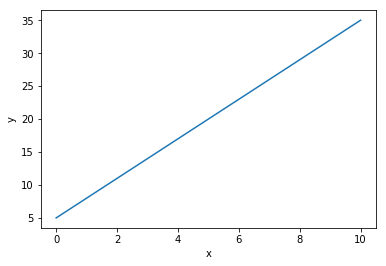

In [24]:
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')

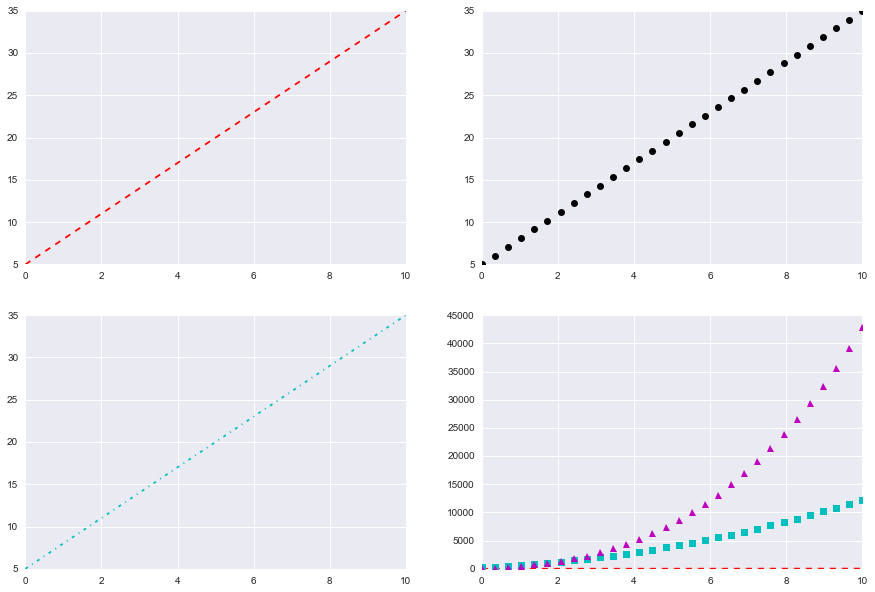

In [149]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.plot(x, y, '--', color='red')

plt.subplot(2,2,2)
plt.plot(x, y, 'o', color='black')

plt.subplot(2,2,3)
plt.plot(x, y, '-.', color='c')

plt.subplot(2,2,4)
plt.plot(x, y, 'r--', x, 10*y**2, 'cs', x, y**3, 'm^')

# Pandas

## pd.plot

`df.plot` plots the index against each column, so we often need to specify the two columns againts which we want to plot. A often used method is `df.groupby`, which summarizes the data by groups and the group names become the index to be passed to `df.plot`.

In [5]:
df = pd.DataFrame({'x':x, 'y':y})

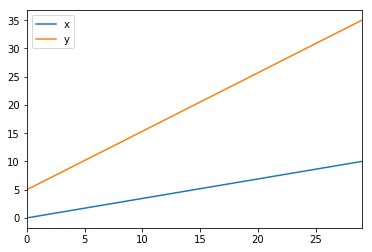

In [6]:
df.plot() # plots the index against each column

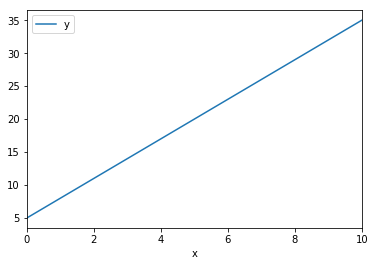

In [7]:
df.plot(x='x',y='y') # so we need to specify the axes

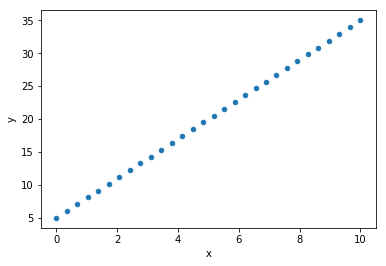

In [31]:
df.plot(x='x', y='y', kind='scatter')

In [10]:
df2 = pd.DataFrame({'country':['Australia', 'Australia', 'USA','USA','USA'],
                    'year':[2015, 2016, 1980, 1981, 1982],
                    'unemployment':[6.06, 5.72, 7.14, 7.60, 9.71]})

In [11]:
df2

,country,year,unemployment
0,Australia,2015,6.06
1,Australia,2016,5.72
2,USA,1980,7.14
3,USA,1981,7.60
4,USA,1982,9.71


In [29]:
df2.groupby('country')['unemployment'].mean() 
# now it has meaningful index that can be passed directly to .plot()

country
Australia    5.89
USA          8.15
Name: unemployment, dtype: float64

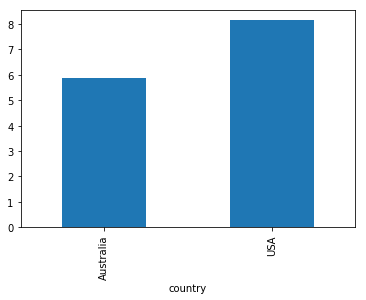

In [30]:
df2.groupby('country')['unemployment'].mean().plot(kind='bar')

# Seaborn

First, some univariate plots:

## Histograms and KDE

In [79]:
import seaborn as sns
sns.set() # setting the style of Seaborn plots

In [33]:
data = np.random.multivariate_normal([0,0],[[5,2],[2,2]], size=2000)
data = pd.DataFrame(data, columns=['x','y'])

In [34]:
data.head()

,x,y
0,3.287752,0.964413
1,-1.493281,-1.114161
2,1.473470,0.679222
3,0.760759,1.256521
4,1.152063,0.595138


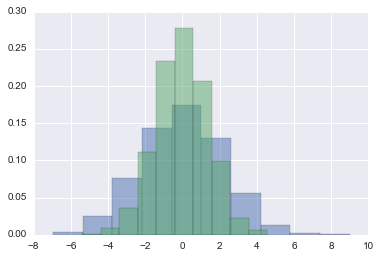

In [83]:
for col in 'xy':
    plt.hist(data[col], normed=True, alpha=0.5)

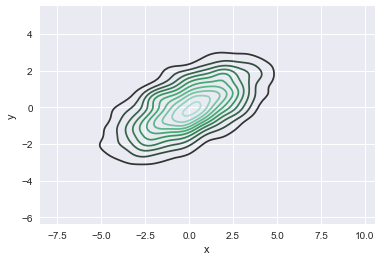

In [66]:
sns.kdeplot(data['x'],data['y']) # if both cols passed at the same time

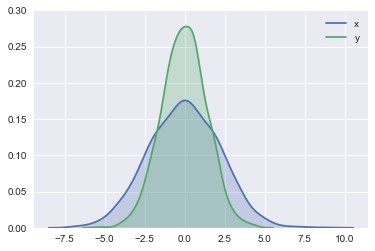

In [59]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)
    plt.ylim(0, 0.3)

(0, 0.35)

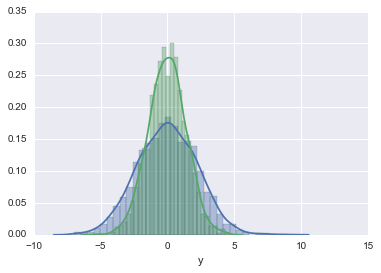

In [82]:
sns.distplot(data['x'])
sns.distplot(data['y'])
plt.ylim(0, 0.35)

## jointplot

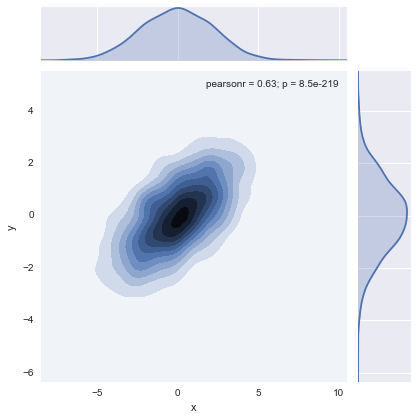

In [81]:
sns.jointplot('x','y', data, kind='kde')

## pairplot

Joint plots for more than two dimensions. Useful for exploring multivariate correlations.

In [77]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


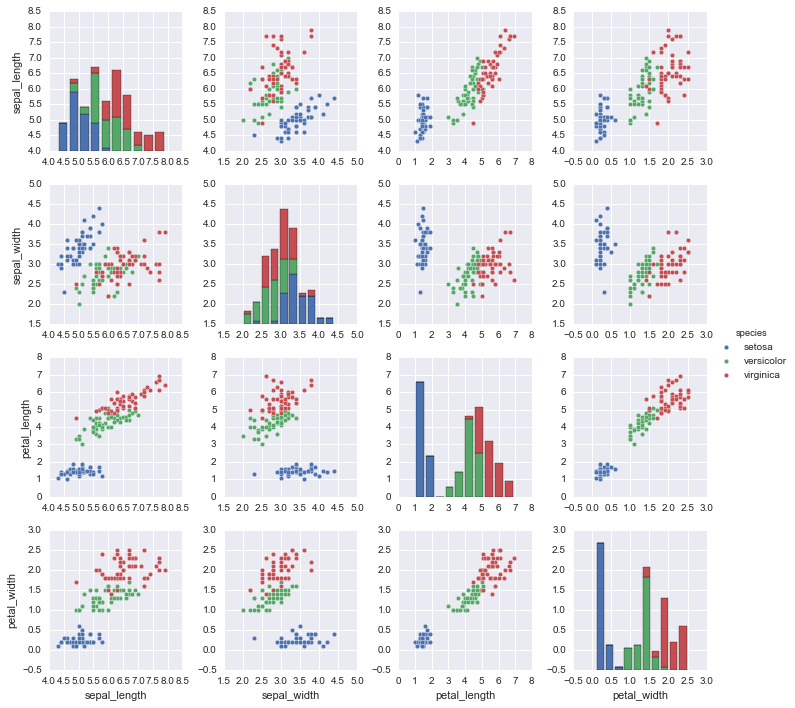

In [80]:
sns.pairplot(iris,hue='species',size=2.5)

## facetgrid

To make histograms on subsets of categories.

In [85]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [86]:
tips['tip_pct'] = 100*tips['tip']/tips['total_bill']

In [87]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


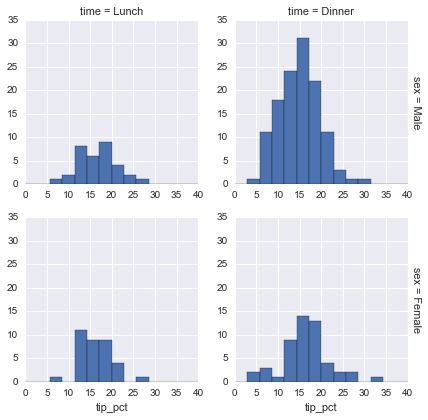

In [91]:
grid = sns.FacetGrid(tips, row='sex', col='time', margin_titles=True)
grid.map(plt.hist, 'tip_pct', bins=np.linspace(0,40,15))
# bins make sure every graph has the same x scale

Next, some multivariate plots:

## factorplot

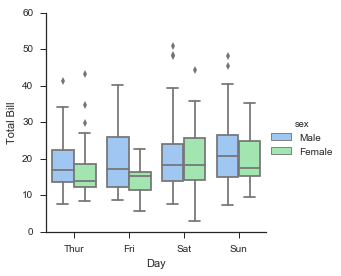

In [154]:
with sns.axes_style(style='ticks'): # applying the style to the whole block
    g = sns.factorplot('day','total_bill','sex',data=tips, kind='box', 
                       palette='pastel')
    g.set_axis_labels('Day','Total Bill')

In [97]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


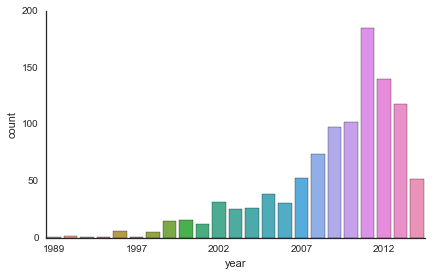

In [106]:
with sns.axes_style('white'):
    g = sns.factorplot('year', data=planets, aspect=1.5, kind='count')
    g.set_xticklabels(step=5)

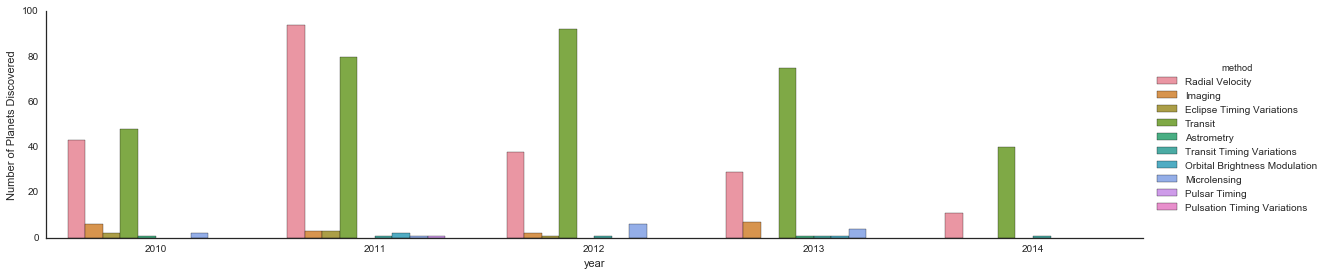

In [112]:
with sns.axes_style('white'):
    g = sns.factorplot('year', data=planets, aspect=4, kind='count',
                       hue='method', order=range(2010,2015))
    g.set_ylabels('Number of Planets Discovered')

## lmplot

In [113]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


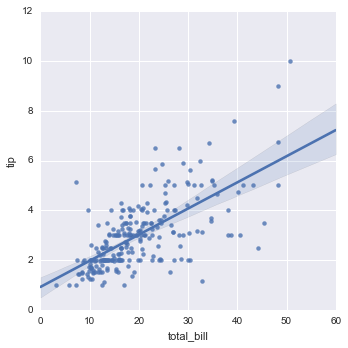

In [114]:
sns.lmplot(x='total_bill', y = 'tip', data=tips)

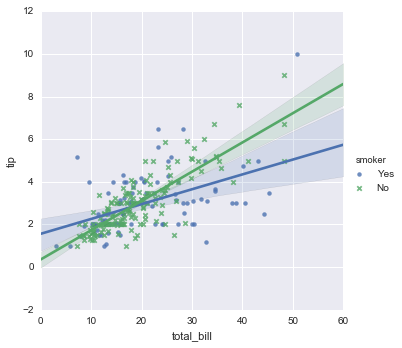

In [120]:
sns.lmplot(x='total_bill', y = 'tip', hue='smoker', data=tips,
          markers=['o','x'])

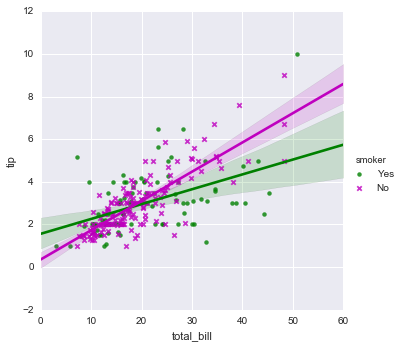

In [121]:
sns.lmplot(x='total_bill', y = 'tip', hue='smoker', data=tips,
          markers=['o','x'], palette=dict(Yes='g', No='m'))

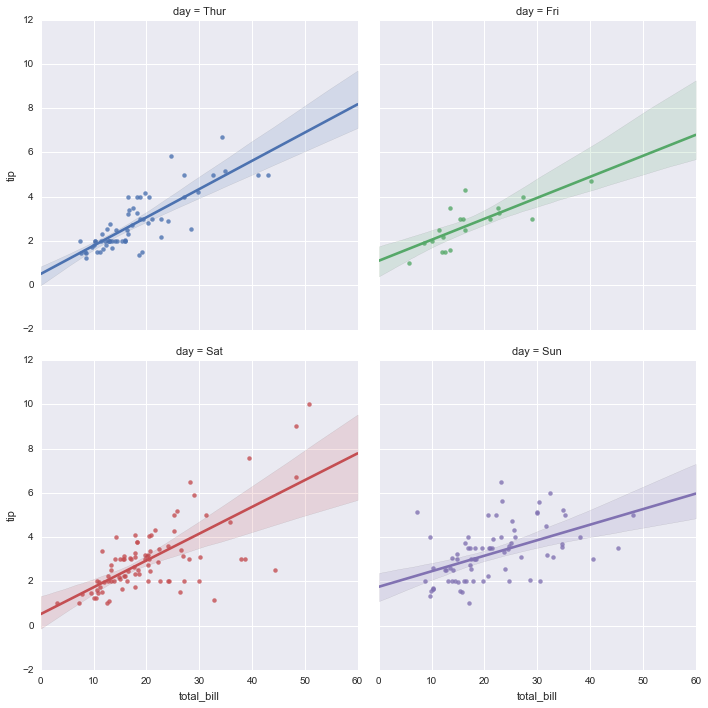

In [126]:
sns.lmplot(x='total_bill', y = 'tip', hue='day', col='day', 
           data=tips, col_wrap=2)

## heatmap

In [127]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [129]:
flights = flights.pivot(index='month', columns='year', values='passengers')

In [130]:
flights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


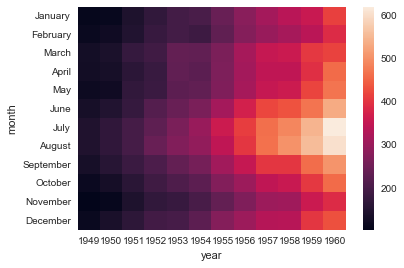

In [131]:
sns.heatmap(flights)

In [163]:
df = pd.DataFrame(np.random.randn(35, 35))

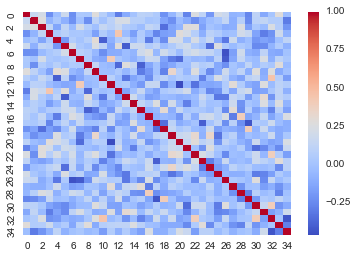

In [164]:
sns.heatmap(df.corr(),cmap='coolwarm') # divergent color code

# altair

In [165]:
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [167]:
cars = alt.load_dataset('cars')

In [168]:
cars.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


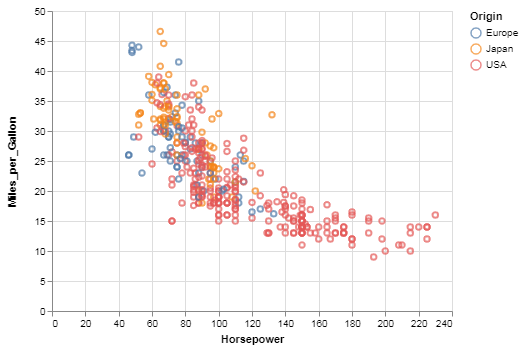

In [170]:
alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin:N'
)

## Faceting

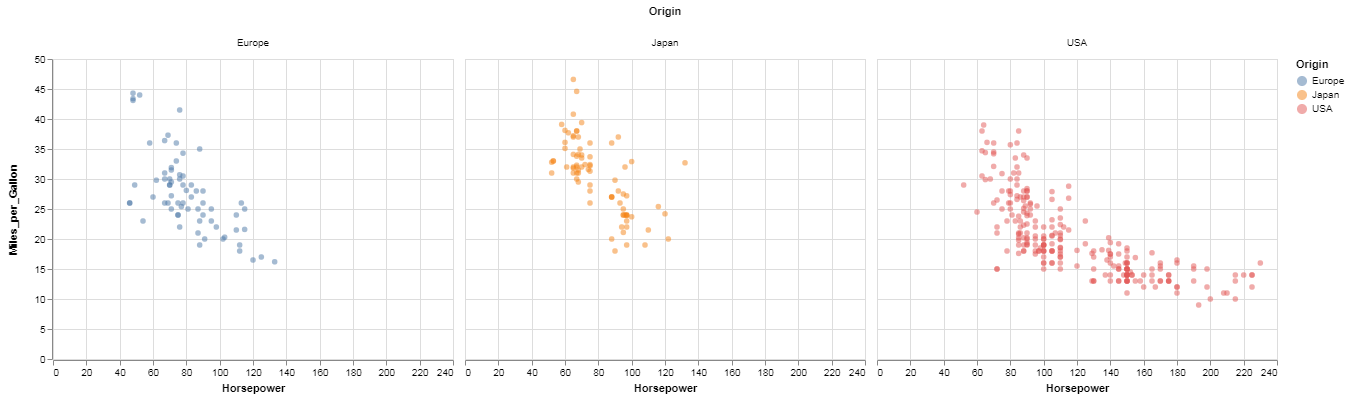

In [184]:
alt.Chart(cars).mark_circle(opacity=0.5).encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin'
).facet(column='Origin')

Changing the opacity:

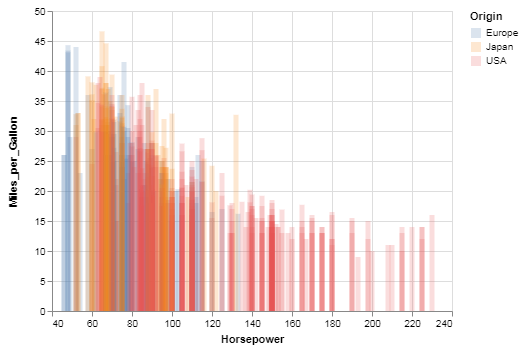

In [181]:
alt.Chart(cars).mark_bar(opacity=0.2).encode(
    x='Horsepower',
    y='Miles_per_Gallon:Q',
    color='Origin'
)

## Interactions

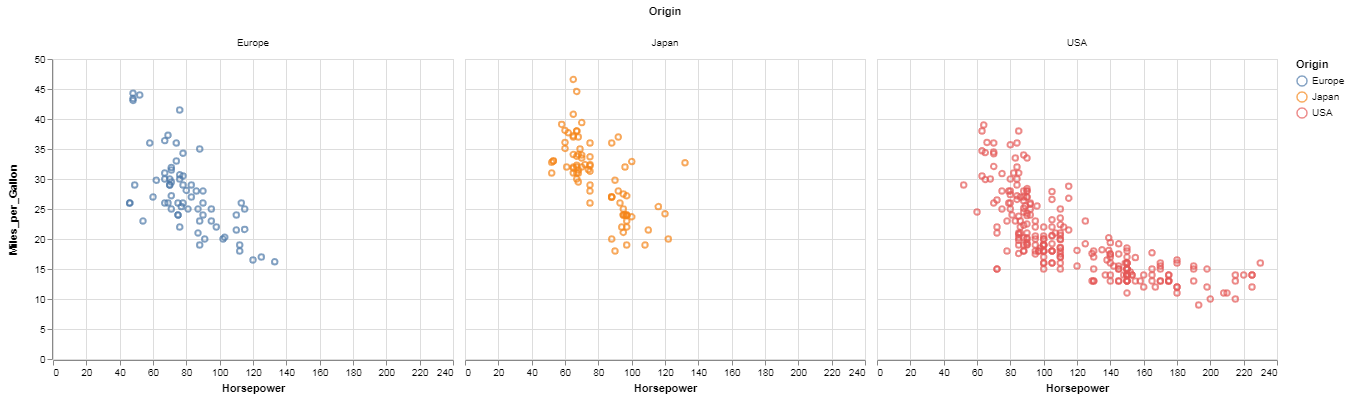

In [185]:
alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin'
).facet(column='Origin').interactive()

### Selections

-`selection_single()`: selecting single element at a time

-`selection_multi()`: selecting multiple items at once through clicking or mouseover

-`selection_interval()`: selecting multiple items through brushing

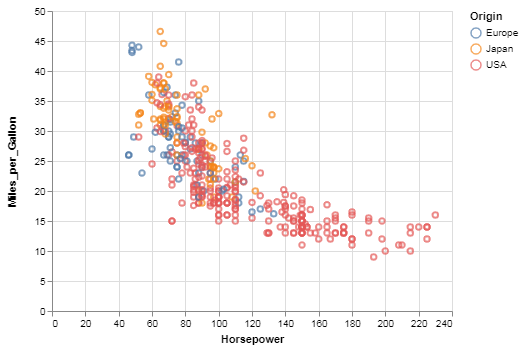

In [194]:
brush = alt.selection_interval()

alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color=alt.condition(brush, 'Origin', alt.value('lightgray'))
).properties(
    selection=brush
)

## histograms

`count()` aggregation function

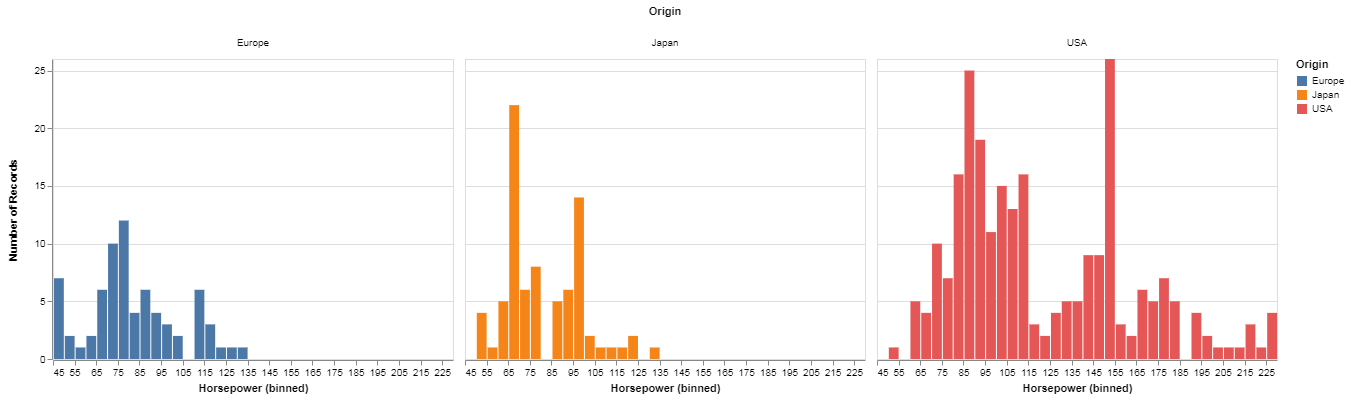

In [198]:
alt.Chart(cars).mark_bar().encode(
    alt.X('Horsepower',bin=alt.BinParams(maxbins=40)), # or simply: bin=True
    y='count(*):Q',
    color='Origin'
).facet(column='Origin')

## Layers

Layers with interaction:

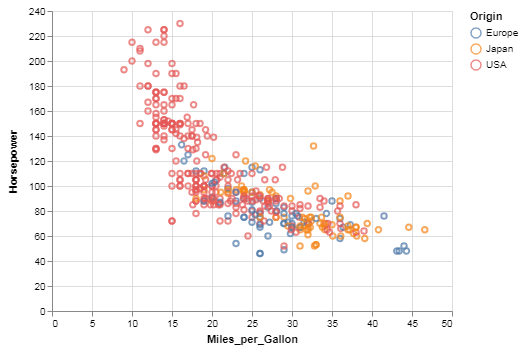

In [201]:
# the 'empty' setting akes all text hidden before any mouseover occurs
pointer = alt.selection_single(on='mouseover',nearest=True,empty='none')

base = alt.Chart().encode(
    x='Miles_per_Gallon', 
    y='Horsepower'
)

chart = alt.layer(
    base.mark_point().properties(selection=pointer).encode(color='Origin'),
    base.mark_text(dx=8,dy=3,align='left').encode(text=alt.condition(pointer,'Name',alt.value(''))),
    data=cars
)

chart